# 0.1 Importing  

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing dataframe
path = r'/Users/amirihayes/Desktop/Careery Foundry Files/(1) Data Immersion/Acheivemtent 4/Instacart Basket Analysis *Master Folder*'

In [3]:
# Import departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

# 0.2 Directions 4.10 prt1

In [4]:
# step 1
# Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
ords_cust_products_merged_4_9 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_cust_products_merged_4_9.pkl'))

In [5]:
# step 2
# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
ords_cust_products_merged_4_9.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  first_order  product_id  add_to_cart_order  ...  \
0                     NaN         True       196.0                1.0  ...   
1                     NaN         True     14084.0                2.0  ...   
2                     NaN         True     12427.0                3.0  ...   
3                     NaN         True     26088.0                4.0  ...   
4                     NaN         True     26405.0                5.0  ...   

     frequency_flag first_name  surname  gender    state age date_joined  \
0  Regular customer      Linda   Nguyen  Female  Alabama  31   2/17/2019   
1  Regular customer      Linda   Nguyen  Female  Alabama  31   2/17/2019   
2  Regular customer      Linda   Nguyen  Female  Alabama  31   2/17/2019   
3  Regular customer      Linda   Nguyen  Female  Alabama  31   2/17/2019   
4  Regular customer      Linda   Nguyen  Female  Alabama  31   2/17/2019   

  number_of_dependants fam_status income  
0                    3    married  40423  
1                    3    married  40423  
2                    3    married  40423  
3                    3    married  40423  
4                    3    married  40423  

[5 rows x 35 columns]

(1) "first_name" and "surname" are the only examples of PII data. However since the exercise said that deleting or scrubing problematic columns is "not advisable" for right now i'm going to leave it. 

(a) Full quote : "you’ll sometimes be asked to delete, or “scrub,” the problematic columns and carry on with the rest of your analysis. While not advisable, don’t be surprised if it happens."

(b) However after our conversation I will remove them like we discussed. 

In [6]:
ords_cust_products_merged_4_9 = ords_cust_products_merged_4_9.drop(columns = ['first_name'])

In [7]:
ords_cust_products_merged_4_9 = ords_cust_products_merged_4_9.drop(columns = ['surname'])

In [8]:
# step 3
ords_cust_products_merged_4_9['state'].value_counts()

Pennsylvania            671781
California              664472
Rhode Island            661705
Georgia                 661136
New Mexico              659231
Arizona                 658597
North Carolina          656372
Oklahoma                656318
Alaska                  653070
Minnesota               652467
Massachusetts           651063
Wyoming                 648970
Virginia                646146
Missouri                645366
Texas                   645094
Colorado                643864
Maine                   643218
North Dakota            643040
Alabama                 642694
Louisiana               642222
Kansas                  642064
Delaware                641521
South Carolina          641466
Oregon                  641009
Arkansas                640781
New York                640750
Nevada                  640740
Montana                 639881
South Dakota            638405
Illinois                637520
Hawaii                  637490
Washington              637488
Mississi

In [9]:
# step 3a
# Creating a list of region labels using for-loop with if-statements.
region = []
for state in ords_cust_products_merged_4_9['state']:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        region.append('Northeast')
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        region.append('Midwest')
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        region.append('South')
    elif state in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        region.append('West')
    else:
        region.append('Unknown')

In [10]:
# Creating the new column.
ords_cust_products_merged_4_9['region'] = region

In [11]:
# Checking region value counts.
ords_cust_products_merged_4_9['region'].value_counts(dropna = False)

South        10870719
West          8353182
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

In [12]:
# Verify the region counts match the state counts.
ords_cust_products_merged_4_9['region'].value_counts().sum()

32641268

In [13]:
ords_cust_products_merged_4_9['state'].value_counts().sum()

32641268

In [14]:
# Checking region value counts in percentage. (normalized region percentages)
spenders_normalized_data = ords_cust_products_merged_4_9['region'].value_counts(normalize=True)

In [15]:
spenders_normalized_data

South        0.333036
West         0.255909
Midwest      0.234444
Northeast    0.176612
Name: region, dtype: float64

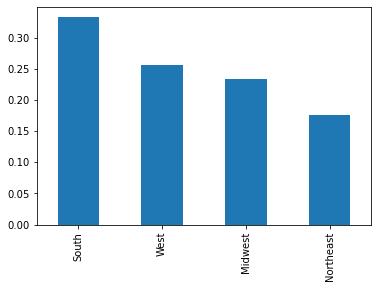

In [16]:
# Bar chart for the regions value counts in percentage. 
spenders_normalized_data = spenders_normalized_data.plot.bar()

In [17]:
# Export the above visual (spenders_normalized_data).
spenders_normalized_data.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_normalized_data_barchart_key0.png'))

In [18]:
# step 3b
# Crossing region with spending_flag
crossing_var_1 = pd.crosstab(ords_cust_products_merged_4_9['region'], ords_cust_products_merged_4_9['spending_flag'], dropna = False)

In [19]:
crossing_var_1

spending_flag  High Spender  Low Spender
region                                  
Midwest              157347      7495188
Northeast            109140      5655692
South                211679     10659040
West                 161834      8191348

In [20]:
# Computing percentages of high spenders per region.
Midwest = (157347 / (157347+7495188)) * 100
Northeast = (109140 / (109140+5655692)) * 100
South = (211679 / (211679+10659040)) * 100
West = (161834 / (161834+8191348)) * 100

In [21]:
Midwest, Northeast, South, West

(2.05614218033632, 1.893203479303473, 1.9472401043574026, 1.9373934388117007)

In [22]:
# step 4
# Creating low activity flag for <5 orders.
ords_cust_products_merged_4_9.loc[ords_cust_products_merged_4_9['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [23]:
# Creating normal to high activity flag for >=5 orders.
ords_cust_products_merged_4_9.loc[ords_cust_products_merged_4_9['max_order'] >= 5, 'activity_flag'] = 'Normal to high activity'

In [24]:
# Checking variable counts. 
ords_cust_products_merged_4_9['activity_flag'].value_counts(dropna = False)

Normal to high activity    31929979
Low activity                 711289
Name: activity_flag, dtype: int64

In [25]:
# Create two subset dataframes (low_activity) & (high_activity).
low_activity_4_10 = ords_cust_products_merged_4_9[ords_cust_products_merged_4_9['activity_flag']=='Low activity']

In [26]:
normal_activity_4_10 = ords_cust_products_merged_4_9[ords_cust_products_merged_4_9['activity_flag']=='Normal to high activity']

In [27]:
# Check the max order within both dataframes.
low_activity_4_10['max_order'].value_counts(dropna = False)

4    711289
Name: max_order, dtype: int64

In [28]:
normal_activity_4_10['max_order'].value_counts(dropna = False)

100    1173687
7       825922
9       822821
10      819874
8       816445
        ...   
94       50497
91       48455
98       45019
99       44651
97       40523
Name: max_order, Length: 96, dtype: int64

In [29]:
# Export both data frames.
low_activity_4_10.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_export_4_10.pkl'))

In [30]:
normal_activity_4_10.to_pickle(os.path.join(path,'02 Data','Prepared Data','normal_activity_export_4_10.pkl'))

In [31]:
# step 5
pd.set_option("display.max_rows", None)
normal_activity_4_10['age'].value_counts(dropna = False).sort_index()

18    492997
19    511257
20    496283
21    505072
22    506080
23    509032
24    501847
25    463955
26    504958
27    516582
28    479739
29    512701
30    501731
31    522600
32    489458
33    486608
34    499472
35    511365
36    475454
37    503475
38    507586
39    501100
40    498382
41    467625
42    499667
43    513968
44    509312
45    504363
46    486810
47    509673
48    522334
49    523569
50    481890
51    507015
52    495041
53    494123
54    512935
55    503670
56    514394
57    489622
58    494817
59    495835
60    477414
61    479991
62    487983
63    489086
64    520260
65    479135
66    468938
67    487193
68    516123
69    504774
70    494776
71    478448
72    494873
73    513667
74    492674
75    513743
76    492181
77    493995
78    486974
79    523784
80    507612
81    501958
Name: age, dtype: int64

In [32]:
normal_activity_4_10['fam_status'].value_counts(dropna = False)

married                             22421852
single                               5248979
divorced/widowed                     2730548
living with parents and siblings     1528600
Name: fam_status, dtype: int64

In [33]:
# Create new variables with age_groups, income_groups, and parent/number of dependents.
# step 5a age_groups (shown below). 
normal_activity_4_10['number_of_dependants'].value_counts(dropna = False)

3    8014062
0    7979527
2    7974823
1    7961567
Name: number_of_dependants, dtype: int64

In [34]:
normal_activity_4_10[['age','number_of_dependants','income']].mean()

age                        49.467090
number_of_dependants        1.501830
income                  99533.430494
dtype: float64

In [35]:
age_groups = []

for value in normal_activity_4_10['age']:
    if (value <= 41): 
        age_groups.append('1) gen z & millennials 18-41')
    elif (value >= 42) & (value <= 57):
        age_groups.append('2) gen x 42-57')
    elif (value >= 58):
        age_groups.append('3) boomers 58+')

In [36]:
# Add result shown above as new column.
normal_activity_4_10['age_groups'] = age_groups

<ipython-input-36-4d7439ca3b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_activity_4_10['age_groups'] = age_groups


In [37]:
normal_activity_4_10['age_groups'].value_counts(dropna = False)

1) gen z & millennials 18-41    11965359
3) boomers 58+                  11896234
2) gen x 42-57                   8068386
Name: age_groups, dtype: int64

In [38]:
# step 5b income_groups
normal_activity_4_10['income'].describe()

count    3.192998e+07
mean     9.953343e+04
std      4.308692e+04
min      2.590300e+04
25%      6.712400e+04
50%      9.667400e+04
75%      1.279750e+05
max      5.939010e+05
Name: income, dtype: float64

In [39]:
normal_activity_4_10['income'].value_counts()

72344     4397
112610    4266
57501     4155
115620    3835
36163     3660
97928     3452
125077    3421
94497     3403
99954     3396
50556     3225
118872    3220
105378    3212
152166    3207
97402     3185
52769     3122
72170     3110
113016    3087
109407    3077
164011    3041
55237     3026
82853     3014
96505     2999
70584     2991
108453    2960
57242     2955
117606    2948
109599    2924
138180    2922
39830     2912
141212    2908
65240     2908
41914     2883
98333     2874
99155     2867
92898     2854
96918     2845
63243     2843
100426    2841
88471     2837
38077     2830
62804     2814
66145     2813
143713    2808
92162     2787
118816    2749
41299     2748
110936    2746
54014     2723
64258     2720
85676     2720
63330     2717
93689     2710
111228    2708
145129    2698
57256     2694
67477     2693
73495     2690
103157    2663
154809    2654
120977    2635
95710     2617
68848     2612
62963     2601
37788     2597
114171    2596
99018     2594
128467    

In [40]:
income_groups = []

for value in normal_activity_4_10['income']:
    if (value < 50000): 
        income_groups.append('1) less than $50K')
    elif (value >= 50000) & (value < 100000):
        income_groups.append('2) $50K to less than $100K')
    elif (value >= 100000) & (value < 150000):
        income_groups.append('3) $100K to less than $150K')
    else:
        income_groups.append('4) $150K or more')

In [41]:
# Add result(s) as new column and groups buckets with original income values.
normal_activity_4_10['income_groups'] = income_groups

<ipython-input-41-d3e5cec2217b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_activity_4_10['income_groups'] = income_groups


In [42]:
income_groups

['1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less than $50K',
 '1) less 

In [43]:
normal_activity_4_10['income_groups'].value_counts(dropna = False).sort_index()

1) less than $50K               3511073
2) $50K to less than $100K     13799255
3) $100K to less than $150K    10618781
4) $150K or more                4000870
Name: income_groups, dtype: int64

In [50]:
# step 5c number of dependents
parents = []

for value in normal_activity_4_10['number_of_dependants']:
    if (value == 0): 
        parents.append('no_dependants')
    elif (value > 0):
        parents.append('dependants')

In [51]:
parents

['dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependants',
 'dependan

In [52]:
normal_activity_4_10['parents'] = parents

<ipython-input-52-9034b9e6d8b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_activity_4_10['parents'] = parents


In [53]:
normal_activity_4_10['parents'].value_counts(dropna = False)

dependants       23950452
no_dependants     7979527
Name: parents, dtype: int64

In [54]:
# Create customer profiles based on grouped age and parental status.
normal_activity_4_10.loc[(normal_activity_4_10['age_groups'] == '1) gen z & millennials 18-41') & (normal_activity_4_10['parents'] == 'dependents'), 'profile_loc'] = 'young parents'

/Users/amirihayes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/amirihayes/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [55]:
normal_activity_4_10.loc[(normal_activity_4_10['age_groups'] == '1) gen z & millennials 18-41') & (normal_activity_4_10['parents'] == 'no_dependants'), 'profile_loc'] = 'young non-parents'

In [56]:
normal_activity_4_10.loc[(normal_activity_4_10['age_groups'] == '2) gen x 42-57') & (normal_activity_4_10['parents'] == 'no_dependants'), 'profile_loc'] = 'middle age non-parents'

In [57]:
normal_activity_4_10.loc[(normal_activity_4_10['age_groups'] == '2) gen x 42-57') & (normal_activity_4_10['parents'] == 'dependants'), 'profile_loc'] = 'middle age parents'

In [58]:
normal_activity_4_10.loc[(normal_activity_4_10['age_groups'] == '3) boomers 58+') & (normal_activity_4_10['parents'] == 'no_dependants'), 'profile_loc'] = 'elder non-parents'

In [59]:
normal_activity_4_10.loc[(normal_activity_4_10['age_groups'] == '3) boomers 58+') & (normal_activity_4_10['parents'] == 'dependants'), 'profile_loc'] = 'elder parents'

In [63]:
# For some reason young parent isn't showing up in the output as shown below. 
# So from now on assume all NaN values in the profile_loc column represent young parents.
normal_activity_4_10['profile_loc'].value_counts(dropna = False).sort_index()

elder non-parents         2999682
elder parents             8896552
middle age non-parents    1989722
middle age parents        6078664
young non-parents         2990123
NaN                       8975236
Name: profile_loc, dtype: int64

In [64]:
# You can see these NaN variables on the farthest right in profile_loc column. 
normal_activity_4_10.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  first_order  product_id  add_to_cart_order  ...  \
0                     NaN         True       196.0                1.0  ...   
1                     NaN         True     14084.0                2.0  ...   
2                     NaN         True     12427.0                3.0  ...   
3                     NaN         True     26088.0                4.0  ...   
4                     NaN         True     26405.0                5.0  ...   

   date_joined number_of_dependants  fam_status  income  region  \
0    2/17/2019                    3     married   40423   South   
1    2/17/2019                    3     married   40423   South   
2    2/17/2019                    3     married   40423   South   
3    2/17/2019                    3     married   40423   South   
4    2/17/2019                    3     married   40423   South   

             activity_flag                    age_groups      income_groups  \
0  Normal to high activity  1) gen z & millennials 18-41  1) less than $50K   
1  Normal to high activity  1) gen z & millennials 18-41  1) less than $50K   
2  Normal to high activity  1) gen z & millennials 18-41  1) less than $50K   
3  Normal to high activity  1) gen z & millennials 18-41  1) less than $50K   
4  Normal to high activity  1) gen z & millennials 18-41  1) less than $50K   

      parents profile_loc  
0  dependants         NaN  
1  dependants         NaN  
2  dependants         NaN  
3  dependants         NaN  
4  dependants         NaN  

[5 rows x 39 columns]

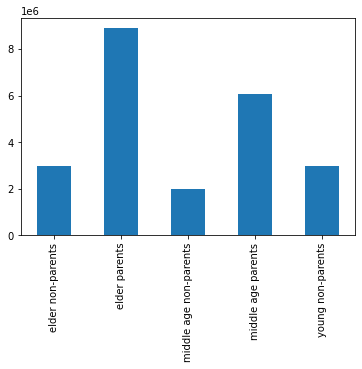

In [65]:
# step 6
bar_chart_dist_of_prof_4_10 = normal_activity_4_10['profile_loc'].value_counts().sort_index().plot.bar()

In [72]:
#step 7
# Aggregate order_number by profile_loc.
normal_activity_4_10.groupby('profile_loc').agg({'order_number': ['mean', 'min', 'max']})

order_number         
                               mean min  max
profile_loc                                 
elder non-parents         17.744737   1  100
elder parents             17.349960   1  100
middle age non-parents    17.699542   1  100
middle age parents        17.419624   1  100
young non-parents         17.384304   1  100

In [73]:
normal_activity_4_10.groupby('income_groups').agg({'order_number': ['mean', 'min', 'max']})

order_number         
                                    mean min  max
income_groups                                    
1) less than $50K              16.358492   1  100
2) $50K to less than $100K     17.642789   1  100
3) $100K to less than $150K    17.513520   1  100
4) $150K or more               17.766619   1  100

In [74]:
normal_activity_4_10.groupby('profile_loc').agg({'prices': ['mean', 'min', 'max']})

prices              
                             mean  min      max
profile_loc                                    
elder non-parents       11.280170  1.0  99999.0
elder parents           11.919837  1.0  99999.0
middle age non-parents  13.523687  1.0  99999.0
middle age parents      11.668566  1.0  99999.0
young non-parents       11.946590  1.0  99999.0

In [75]:
# Prices by income
normal_activity_4_10.groupby('income_groups').agg({'prices': ['mean', 'min', 'max']})

prices              
                                  mean  min      max
income_groups                                       
1) less than $50K             6.703349  1.0     25.0
2) $50K to less than $100K    8.446837  1.0  99999.0
3) $100K to less than $150K  10.436485  1.0  99999.0
4) $150K or more             32.717660  1.0  99999.0

In [76]:
# step 8
# Customer profiles by region (the region breakdown is very similar across profiles)
pd.crosstab(normal_activity_4_10['profile_loc'], normal_activity_4_10['region'], dropna = False, normalize = 'index')

region                   Midwest  Northeast     South      West
profile_loc                                                    
elder non-parents       0.233658   0.179585  0.331298  0.255458
elder parents           0.232292   0.178350  0.332627  0.256732
middle age non-parents  0.241186   0.168611  0.324329  0.265874
middle age parents      0.238527   0.178054  0.326800  0.256619
young non-parents       0.233263   0.175022  0.342427  0.249288

In [77]:
# Customer profiles by department 
pd.crosstab(normal_activity_4_10['profile_loc'], normal_activity_4_10['department_id'], dropna = False, normalize = 'index')

department_id               1.0       2.0       3.0       4.0       5.0   \
profile_loc                                                                
elder non-parents       0.069724  0.001111  0.036097  0.294077  0.004482   
elder parents           0.068839  0.001107  0.036138  0.293061  0.004627   
middle age non-parents  0.068848  0.001104  0.036805  0.292485  0.005301   
middle age parents      0.068912  0.001114  0.036268  0.291284  0.004443   
young non-parents       0.067372  0.001162  0.036312  0.294035  0.004779   

department_id               6.0       7.0       8.0       9.0       10.0  ...  \
profile_loc                                                               ...   
elder non-parents       0.008270  0.083197  0.003012  0.026648  0.000996  ...   
elder parents           0.008186  0.083724  0.002970  0.026554  0.001089  ...   
middle age non-parents  0.008229  0.083824  0.003030  0.026407  0.001062  ...   
middle age parents      0.008276  0.083609  0.003030  0.026842  0.001068  ...   
young non-parents       0.008489  0.083191  0.003084  0.026396  0.001033  ...   

department_id               12.0      13.0      14.0      15.0      16.0  \
profile_loc                                                                
elder non-parents       0.021775  0.057631  0.021349  0.032063  0.166999   
elder parents           0.022141  0.057980  0.021562  0.032935  0.166150   
middle age non-parents  0.021403  0.057903  0.021897  0.032725  0.166057   
middle age parents      0.021880  0.057828  0.021831  0.032822  0.166595   
young non-parents       0.021213  0.057118  0.021493  0.032985  0.167305   

department_id               17.0      18.0      19.0      20.0      21.0  
profile_loc                                                               
elder non-parents       0.022107  0.012868  0.088906  0.032925  0.001945  
elder parents           0.022987  0.012973  0.088824  0.032388  0.002131  
middle age non-parents  0.022147  0.013422  0.089326  0.032339  0.002072  
middle age parents      0.022975  0.013440  0.089349  0.032232  0.002137  
young non-parents       0.022374  0.013494  0.089240  0.032866  0.002218  

[5 rows x 21 columns]

In [78]:
# Department by region. 
pd.crosstab(normal_activity_4_10['department_id'], normal_activity_4_10['region'], dropna = False, normalize = 'columns')

region          Midwest  Northeast     South      West
department_id                                         
1.0            0.068806   0.068081  0.069088  0.068741
2.0            0.001101   0.001150  0.001128  0.001091
3.0            0.036045   0.036449  0.036040  0.036352
4.0            0.293578   0.291294  0.293249  0.292762
5.0            0.004727   0.004611  0.004762  0.004684
6.0            0.008371   0.008182  0.008233  0.008362
7.0            0.082403   0.084592  0.083332  0.082079
8.0            0.002941   0.003253  0.002895  0.003055
9.0            0.026728   0.026447  0.026543  0.026868
10.0           0.001085   0.001019  0.001073  0.001096
11.0           0.013884   0.013719  0.013873  0.013522
12.0           0.021841   0.021733  0.021795  0.021967
13.0           0.058057   0.057389  0.057539  0.057919
14.0           0.021532   0.021566  0.021667  0.021913
15.0           0.032841   0.032501  0.032874  0.032973
16.0           0.166643   0.167010  0.166780  0.167091
17.0           0.023079   0.022899  0.022410  0.022603
18.0           0.013111   0.013227  0.013405  0.012855
19.0           0.088730   0.090107  0.088817  0.089565
20.0           0.032336   0.032635  0.032364  0.032471
21.0           0.002161   0.002134  0.002132  0.002031

# Key Questions 1-5

### (Key Question 1)

Text(0, 0.5, 'frequency')

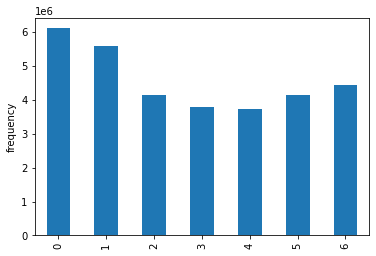

In [79]:
# step 9 
# Bar chart to show when the busiest days of the week are.
bar_dow_busiest_days_key1a = normal_activity_4_10['order_dow'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [80]:
# Export the above image.
bar_dow_busiest_days_key1a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow_key1a.png'))

Text(0, 0.5, 'frequency')

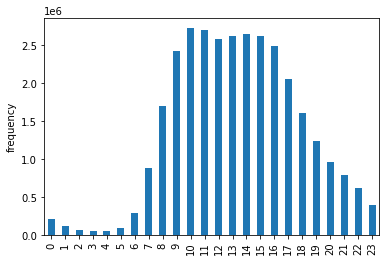

In [81]:
# Bar chart that shows the busiest hours of the day.
bar_busiest_hour_key1b = normal_activity_4_10['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [82]:
# Export the above image.
bar_busiest_hour_key1b.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_key1b.png'))

### (Key Question 2)

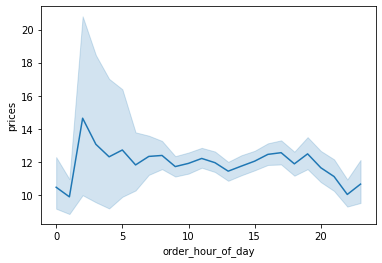

In [83]:
# Line chart showing the prices per hour.
line_price_hour_key2a = sns.lineplot(data = normal_activity_4_10, x = 'order_hour_of_day',y = 'prices')

In [84]:
# Export the above image.
line_price_hour_key2a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_key2a.png'))

In [85]:
# I aggregated all the sum of each hour's total price. 
sum_price_hour_key2b = normal_activity_4_10.groupby('order_hour_of_day').agg({'prices' : ['sum']})

In [86]:
sum_price_hour_key2b

prices
                            sum
order_hour_of_day              
0                  2.239505e+06
1                  1.120085e+06
2                  9.919333e+05
3                  6.566089e+05
4                  6.424012e+05
5                  1.099074e+06
6                  3.389172e+06
7                  1.084357e+07
8                  2.097294e+07
9                  2.830152e+07
10                 3.231721e+07
11                 3.275884e+07
12                 3.063052e+07
13                 2.984471e+07
14                 3.096984e+07
15                 3.139654e+07
16                 3.090426e+07
17                 2.562922e+07
18                 1.899125e+07
19                 1.536663e+07
20                 1.114881e+07
21                 8.688399e+06
22                 6.250741e+06
23                 4.207056e+06

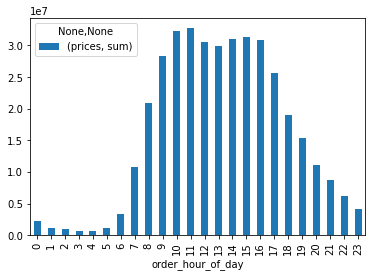

In [87]:
bar_price_hour_sum_key2c = sum_price_hour_key2b.plot.bar()

In [88]:
# Export the above image.
bar_price_hour_sum_key2c.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_hour_sum.png'))

In [89]:
# Products purchased prior to 5am?
orders_prior_2_5am = normal_activity_4_10.loc[normal_activity_4_10['order_hour_of_day'] < 5]

In [90]:
normal_activity_4_10['order_hour_of_day'].value_counts(dropna = False)

10    2725478
11    2695829
14    2649190
13    2620711
15    2619705
12    2574901
16    2493907
9     2426087
17    2052430
8     1700666
18    1607146
19    1237579
20     961743
7      883423
21     784844
22     625350
23     396257
6      288126
0      214813
1      113751
5       86914
2       68154
4       52445
3       50530
Name: order_hour_of_day, dtype: int64

In [91]:
orders_prior_2_5am.shape

(499693, 39)

In [92]:
# Top products are still in product dept / don't vary much from overall top products
orders_prior_2_5am_products = orders_prior_2_5am['product_name'].value_counts(dropna = False)

In [93]:
orders_prior_2_5am_products.to_clipboard()

### (Key Question 3)

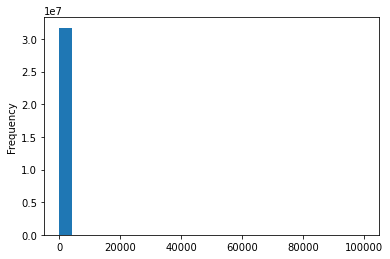

In [94]:
# Histogram of prices.
hist_price_key3a = normal_activity_4_10['prices'].plot.hist(bins = 25)

In [95]:
hist_price_key3a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price_key3a.png'))

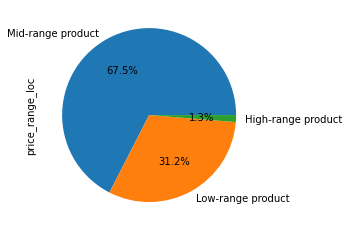

In [96]:
# Pie chart of price range variables.
pie_price_key3b = normal_activity_4_10['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%')

In [97]:
# Export the above image.
pie_price_key3b.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_key3b.png'))

### (Key Question 4)

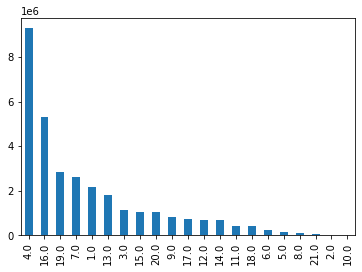

In [98]:
# department bar chart.
bar_dept_key4a = normal_activity_4_10['department_id'].value_counts().plot.bar()

In [99]:
# Export the above image.
bar_dept_key4a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_key4a.png'))

### (Key Question 5)

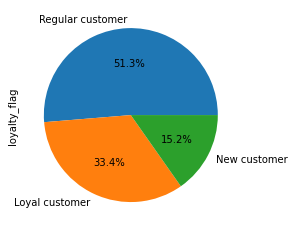

In [100]:
# Distribution among users as it relates to brand loyalty.
pie_loyalty_key5a = normal_activity_4_10['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')

In [101]:
# Export the above image.
pie_loyalty_key5a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

In [102]:
# Crossing loyalty flag by customer profile. 
loyalty_profile_cross_key5b = pd.crosstab(normal_activity_4_10['profile_loc'], normal_activity_4_10['loyalty_flag'], dropna = False, normalize='index')

In [103]:
loyalty_profile_cross_key5b

loyalty_flag            Loyal customer  New customer  Regular customer
profile_loc                                                           
elder non-parents             0.342606      0.149788          0.507606
elder parents                 0.333234      0.154368          0.512398
middle age non-parents        0.342202      0.152460          0.505338
middle age parents            0.334954      0.151855          0.513191
young non-parents             0.329658      0.154691          0.515651

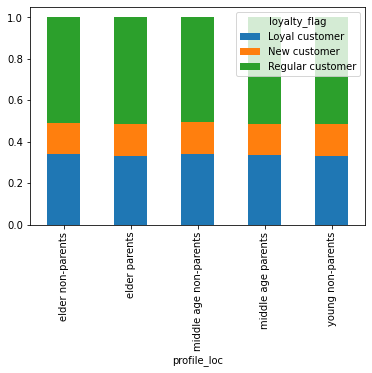

In [104]:
# Creating stacked bar of loyalty/profile cross.
stacked_loyalty_profile_key5c = loyalty_profile_cross_key5b.plot(kind = 'bar', stacked = True)

In [105]:
# Export the above visual (key5c).
stacked_loyalty_profile_key5c.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_profile_key5c.png'))

In [106]:
# Customers differences in ordering habits based on loyalty status.
# Crossing loyalty_flag by spending_flag.
loyalty_spend_cross_key5d = pd.crosstab(normal_activity_4_10['spending_flag'], normal_activity_4_10['loyalty_flag'], dropna = False, normalize='index')

In [107]:
loyalty_spend_cross_key5d

loyalty_flag   Loyal customer  New customer  Regular customer
spending_flag                                                
High Spender         0.358244      0.140736          0.501020
Low Spender          0.333995      0.152722          0.513283

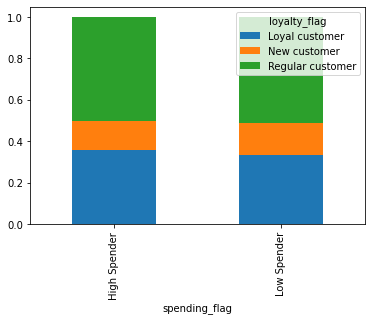

In [108]:
# Create stacked bar of loyalty_flag & spending_flag cross. 
stacked_loyalty_spend_key5e = loyalty_spend_cross_key5d.plot(kind = 'bar', stacked = True)

In [109]:
# Export the above visual (key5e).
stacked_loyalty_spend_key5e.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_spend_key5e.png'))

In [110]:
# Cross loyalty_flag by department_id.
loyalty_dept_cross_key5f = pd.crosstab(normal_activity_4_10['department_id'], normal_activity_4_10['loyalty_flag'], dropna = False, normalize='index')

In [111]:
loyalty_dept_cross_key5f

loyalty_flag   Loyal customer  New customer  Regular customer
department_id                                                
1.0                  0.290524      0.170620          0.538856
2.0                  0.312149      0.169901          0.517950
3.0                  0.342604      0.149319          0.508077
4.0                  0.350841      0.143092          0.506067
5.0                  0.270278      0.193444          0.536277
6.0                  0.309159      0.166579          0.524262
7.0                  0.335314      0.149384          0.515303
8.0                  0.278768      0.168304          0.552928
9.0                  0.298555      0.171464          0.529981
10.0                 0.422128      0.118756          0.459116
11.0                 0.293351      0.172788          0.533860
12.0                 0.304530      0.163069          0.532402
13.0                 0.317594      0.164223          0.518184
14.0                 0.333793      0.154588          0.511618
15.0                 0.294215      0.174072          0.531713
16.0                 0.357566      0.140460          0.501974
17.0                 0.283474      0.177912          0.538614
18.0                 0.413325      0.108352          0.478323
19.0                 0.345028      0.145019          0.509953
20.0                 0.326376      0.153185          0.520440
21.0                 0.283080      0.193693          0.523227

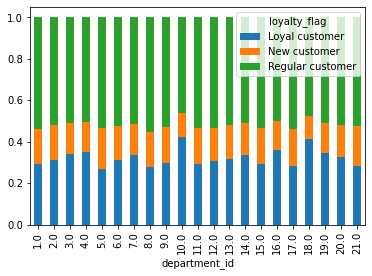

In [112]:
# Creating stacked bar of loyalty_flag & dept_flag
stacked_loyalty_dept_key5g = loyalty_dept_cross_key5f.plot(kind = 'bar', stacked = True)

In [113]:
# Export the above visual (key5g).
stacked_loyalty_dept_key5g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_dept_key5g.png'))

In [114]:
# (Key 5.3 h-k) Are there differences in ordering habits based on a customer’s region?
# Crossing loyalty_flag by spending_flag.
region_spend_cross_key5h = pd.crosstab(normal_activity_4_10['spending_flag'], normal_activity_4_10['region'], dropna = False, normalize='index')

In [115]:
region_spend_cross_key5h

region          Midwest  Northeast     South      West
spending_flag                                         
High Spender   0.246891   0.170634  0.330387  0.252087
Low Spender    0.234230   0.176667  0.333104  0.255999

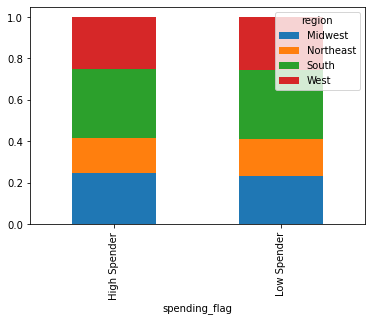

In [116]:
# Create stacked bar visual of region & spending_flag.
stacked_region_spend_key5i = region_spend_cross_key5h.plot(kind = 'bar', stacked = True)

In [117]:
# Create crossing for region by dept. 
region_dept_cross_key5j = pd.crosstab(normal_activity_4_10['department_id'], normal_activity_4_10['region'], dropna = False, normalize='index')

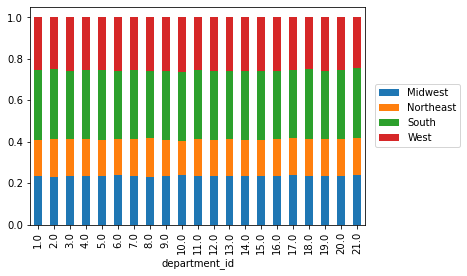

In [118]:
# Create stacked bar visual for region & dept. 
stacked_region_dept_key5k = region_dept_cross_key5j.plot(kind = 'bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.50))

In [119]:
# Export the above visual (key5k).
stacked_region_dept_key5k.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_dept_key5k.png'))

In [120]:
# (Key 5.4 L-o) Is there any link between age & family status in terms of ordering habits.
# Crossing customer profile by spending_flag.
profile_spend_cross_key5L = pd.crosstab(normal_activity_4_10['spending_flag'], normal_activity_4_10['profile_loc'], dropna = False, normalize='index')

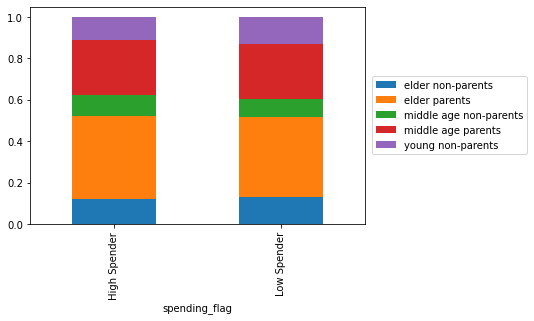

In [121]:
# Create stacked bar of profile & spend. 
stacked_profile_spend_key5M = profile_spend_cross_key5L.plot(kind = 'bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [122]:
# Export the above visual (key5M).
stacked_profile_spend_key5M.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_spend_key5M.png'))

In [123]:
# Cross profile by dept.
profile_dept_cross_key5N = pd.crosstab(normal_activity_4_10['department_id'], normal_activity_4_10['profile_loc'], dropna = False, normalize='index')

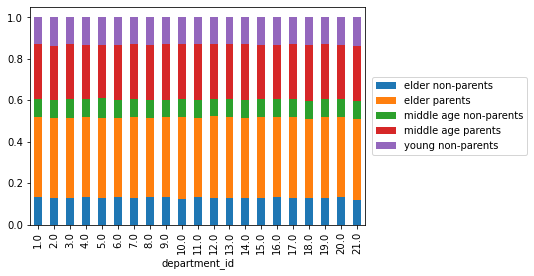

In [124]:
# Create stacked bar of profile & dept.
stacked_profile_dept_key5o = profile_dept_cross_key5N.plot(kind = 'bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [125]:
# Export the above visual (key5o).
stacked_profile_dept_key5o.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_dept_key5o.png'))

In [126]:
# (Key 5.5 p-) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
# Will review aggregated spend by profile and income.
# Aggregate spend by customer profile.
spend_profile_key5p = normal_activity_4_10.groupby('profile_loc').agg({'prices' : ['sum']})

In [127]:
spend_profile_key5p

prices
                                 sum
profile_loc                         
elder non-parents       3.361152e+07
elder parents           1.053420e+08
middle age non-parents  2.672731e+07
middle age parents      7.045919e+07
young non-parents       3.548382e+07

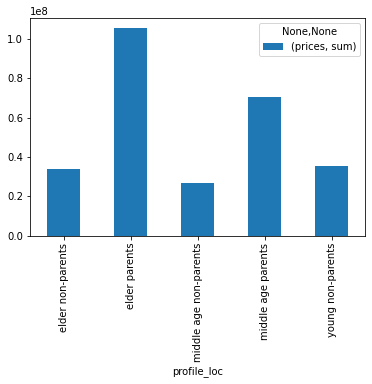

In [128]:
# Bar chart visual of spend by profile.
bar_spend_profile_key5q = spend_profile_key5p.plot.bar()

In [129]:
# Export the above visual (key5q).
bar_spend_profile_key5q.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_profile_key5q.png'))

In [130]:
# Aggregate Spend by income.
spend_income_key5r = normal_activity_4_10.groupby('income_groups').agg({'prices' : ['sum']}).sort_index()

In [131]:
spend_income_key5r

prices
                                      sum
income_groups                            
1) less than $50K            2.331625e+07
2) $50K to less than $100K   1.158131e+08
3) $100K to less than $150K  1.101317e+08
4) $150K or more             1.300998e+08

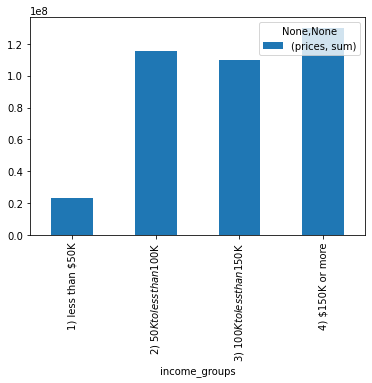

In [132]:
# Bar chart visual of spend by income.
bar_spend_income_key5s = spend_income_key5r.plot.bar()

In [133]:
# Export the above visual (key5s).
bar_spend_income_key5s.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_income_key5s.png'))

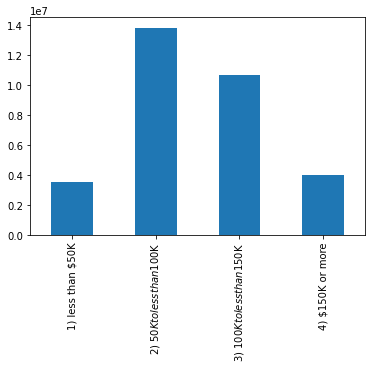

In [134]:
# Bar chart visual of income.
bar_income_key5t = normal_activity_4_10['income_groups'].value_counts().sort_index().plot.bar()

In [135]:
# Export the above visual (key5t).
bar_income_key5t.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_key5t.png'))

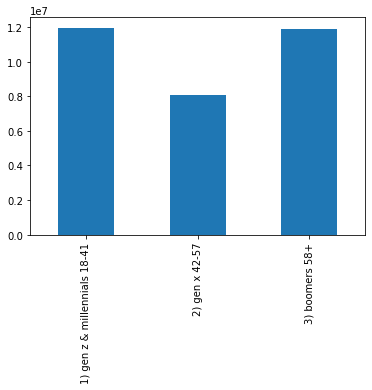

In [136]:
# Bar chart visual of age.
bar_age_key5u = normal_activity_4_10['age_groups'].value_counts().sort_index().plot.bar()

In [137]:
# Export the above visual (key5u).
bar_age_key5u.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_key5u.png'))

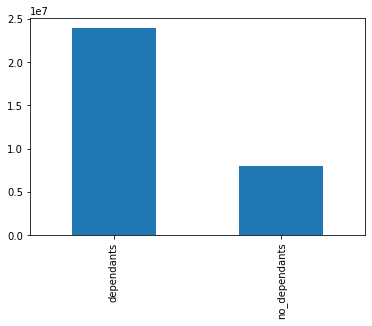

In [138]:
# Bar chart visual of parental status.
bar_parents_key5v = normal_activity_4_10['parents'].value_counts().sort_index().plot.bar()

In [139]:
# Export the above visual (key5v).
bar_parents_key5v.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parents_key5v.png'))

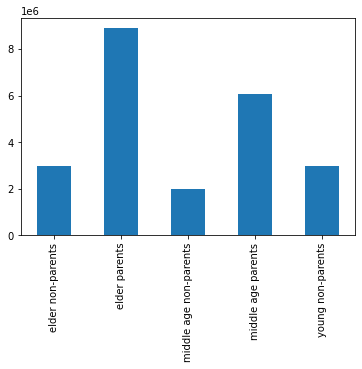

In [140]:
# Bar profile.
bar_profile_key5w = normal_activity_4_10['profile_loc'].value_counts().sort_index().plot.bar()

### (Key Question 6)

In [141]:
# What differences can you find in ordering habits of different customer profiles?
# What is the average price per profile group?
price_profile_key6a = normal_activity_4_10.groupby('profile_loc').agg({'prices' : ['mean','sum']}).sort_index()

In [142]:
price_profile_key6a

prices              
                             mean           sum
profile_loc                                    
elder non-parents       11.280170  3.361152e+07
elder parents           11.919837  1.053420e+08
middle age non-parents  13.523687  2.672731e+07
middle age parents      11.668566  7.045919e+07
young non-parents       11.946590  3.548382e+07

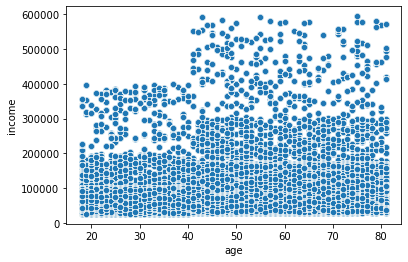

In [143]:
# Scatterplot visual showing age by income.
scatter_age_income_key6b = sns.scatterplot(x = 'age', y = 'income',data = normal_activity_4_10)

In [144]:
# Export the above visual (key6b).
scatter_age_income_key6b.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income_key6b.png'))

In [145]:
# The total orders per profile group.
orders_profile_key6c = normal_activity_4_10.groupby('profile_loc').agg({'order_number' : ['sum','mean']}).sort_index()

In [146]:
orders_profile_key6c

order_number           
                                sum       mean
profile_loc                                   
elder non-parents          53228568  17.744737
elder parents             154354817  17.349960
middle age non-parents     35217168  17.699542
middle age parents        105888044  17.419624
young non-parents          51981206  17.384304

## Exporting Data

In [147]:
normal_activity_4_10.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'normal_activity_4_10_prt1_subset.pkl'))